# Index :-
## 1. Preparing Your Dataset for Cleaning
`Ensure that the necessary files are uploaded to your Jupyter Notebook environment before starting the cleaning process.` 
## 2. Data Cleaning: COVID Deaths, COVID Cases, and Population Datasets
`Detailed steps, code and reasons for cleaning the COVID-19 deaths, cases, and population datasets.`
## 3. Merging of COVID Deaths, COVID Cases and Population
`Description and code of how to merge the COVID Deaths, COVID Cases and Population data with the ACS demographic data.`
## 4. Upload Merge Dataset
`Instructions and code for uploading the dataset.`
## 5. Data for the year 2020
`Details on how to filter and focus on COVID-19 data specific to the year 2020.`
## 6. Calculate COVID-19 data trends for last week
`Steps and code for analyzing COVID-19 trends over the last week of available data on one state.`
## 7. Enrichment dataset: ACS Demographic and Housing Estimates
`Information about the ACS Demographic and Housing Estimates dataset and its relevance.`
## 8. Data Cleaning: ACS Demographic and Housing Estimates
`Procedures for cleaning the ACS dataset to prepare it for analysis.`
## 9. Merging the COVID-19 data with Enrichment data
`Description and code of how to merge the COVID-19 data with the ACS demographic data.`
## 10. Enrichment Data's Role in COVID-19 Spread Analysis with Initial Hypothesis Questions 
`How various components of the enrichment data can aid in the analysis of COVID19 spread`

### 1. Preparing Your Dataset for Cleaning

Before you start data cleaning on the COVID Deaths, COVID Cases, and Population datasets, ensure that the following files have been uploaded to your Jupyter Notebook environment:

1. `covid_deaths_usafacts.csv`
2. `covid_confirmed_usafacts.csv`
3. `covid_county_population_usafacts.csv`

You can reference these files by their names directly in your notebook.

**If the Files Are Not Uploaded**
If you have not uploaded the files yet, please follow these steps:

1. Download the following files:
- covid_deaths_usafacts.csv
- covid_confirmed_usafacts.csv
- covid_county_population_usafacts.csv
2. Upload the files to Jupyter Notebook:
- Click on the 'Upload' button in the Jupyter Notebook interface.
- Select the dataset files from your local system.
Once the files are uploaded, you can reference them by their names in your notebook.

### 2. Data Cleaning: COVID Deaths, COVID Cases, and Population Datasets

As part of the data cleaning process for the `COVID Deaths`, `COVID Cases` and `Population` dataset, the following steps were implemented:

1. Removing Rows with `countyFIPS` Value of 0

- **Action**: Rows where the `countyFIPS` column value is 0 were excluded from all three datasets.
  
- **Reason**: Rows with a `countyFIPS` value of 0 were removed for the following reasons:
  - In the `Population` dataset, counties with a `countyFIPS` value of 0 have a population of 0, which is not meaningful for COVID-19 analysis.
  - It is logical to exclude these rows since counties with zero population would not have COVID-19 cases or deaths.
  - Additionally, the `Enrichment` dataset does not contain any `countyFIPS` codes with a value of 0. Since the datasets need to be merged, it is essential to ensure consistency across all datasets by removing these rows.
  - A countyFIPS code of 0 is not a valid county code in the FIPS standard. As FIPS code for counties in the United States is a 5-digit number where: The first two digits represent the state code and last three digits represent the county code within the state.

- **Result**: This step reduced the number of rows as follows:
  - **COVID Deaths and COVID Cases Datasets**: From 3,193 to 3,142 rows.
  - **Population Dataset**: From 3,195 to 3,144 rows.

**COVID Deaths:**

In [107]:
import pandas as pd
deaths_with_zeroCountyCode=pd.read_csv('covid_deaths_usafacts.csv')
#print("(Rows, Columns)=",deaths_with_zeroCountyCode.shape)
deaths=deaths_with_zeroCountyCode[deaths_with_zeroCountyCode['countyFIPS'] != 0]
print("(Rows, Columns)=",deaths.shape)

(Rows, Columns)= (3142, 1269)


**COVID Cases:**

In [108]:
cases_with_zeroCountyCode=pd.read_csv('covid_confirmed_usafacts.csv')
#print("(Rows, Columns)=",cases_with_zeroCountyCode.shape)
cases=cases_with_zeroCountyCode[cases_with_zeroCountyCode['countyFIPS'] != 0]
print("(Rows, Columns)=",cases.shape)

(Rows, Columns)= (3142, 1269)


**Population:**

In [109]:
population_with_zeroCountyCode=pd.read_csv('covid_county_population_usafacts.csv')
#print(population_with_zeroCountyCode.shape)
population=population_with_zeroCountyCode[population_with_zeroCountyCode['countyFIPS'] != 0]
print("(Rows, Columns)=",population.shape)

(Rows, Columns)= (3144, 4)


### 3. Merging of COVID Deaths, COVID Cases and Population

- **Covid Deaths dataset name**: `deaths`
- **Covid Cases dataset name**: `cases`
- **Population dataset name**: `population`
- **After merging this three dataset name**: `super_covid19_dataframe.csv`

After analyzing the three datasets, we perform a merge on the `countyFIPS` column using an `inner` join.

**Reason for Inner Join**: 
An inner join was chosen based on the following analysis:
- The `population` dataset contained two rows with `countyFIPS` codes 2270 and 6000, where the population value was 0. These rows are not present in the `deaths` and `cases` datasets.
- Additionally, these `countyFIPS` codes are not included in the enrichment dataset.

Using an inner join ensures that only rows with matching `countyFIPS` codes across all three datasets are included. The exclusion of these two rows, which have no relevant data in the other datasets, will not significantly impact the merged result.

By using an inner join, we effectively consolidate the datasets while maintaining data integrity and relevance.

In [110]:
super_cases_population=pd.merge(cases,population[['countyFIPS','population']],on=['countyFIPS'],how='inner')# This combines the cases data with population data based on 'countyFIPS'
print("super_cases_population:(Rows, Columns)=",super_cases_population.shape)
super_deaths_population=pd.merge(deaths,population[['countyFIPS','population']],on=['countyFIPS'],how='inner')# This combines the deaths data with population data based on 'countyFIPS'
print("super_deaths_population:(Rows, Columns)=",super_deaths_population.shape)


# Merge the 'super_cases_population' DataFrame with the 'super_deaths_population' DataFrame.
# Drop the 'County Name', 'State', 'StateFIPS', and 'population' columns from 'super_deaths_population' to avoid duplication
# and use suffixes '_cases' and '_deaths' to differentiate between the case and death data in the merged DataFrame.
super_covid19_dataframe=pd.merge(super_cases_population,super_deaths_population.drop(columns=['County Name', 'State','StateFIPS','population']),on=['countyFIPS'], how='inner',suffixes=('_cases', '_deaths'))
print("super_covid19_dataframe: (Rows, Columns)=",super_covid19_dataframe.shape)

# Save the final DataFrame to a CSV file without the index column
super_covid19_dataframe.to_csv('super_covid19_dataframe.csv', index=False)

super_cases_population:(Rows, Columns)= (3142, 1270)
super_deaths_population:(Rows, Columns)= (3142, 1270)
super_covid19_dataframe: (Rows, Columns)= (3142, 2535)


### 4. Upload Merge Dataset

To upload dataser file:
1. First download the `super_covid19_dataframe.csv` file from path: Group-4/super_covid19_dataframe.csv
2. After downloading, click on the 'Upload' button in the jupyter Notebok interface.
3. Select the dataset file from your local system.
4. Once uploaded, you can use the file in your notebook by referencing its name.


Below code provides instructions for reading and inspecting a dataset of COVID-19 data using the pandas library.

In [111]:
import pandas as pd

super_covid19=pd.read_csv('super_covid19_dataframe.csv')
print("(Rows, Columns)=",super_covid19.shape)

(Rows, Columns)= (3142, 2535)


The below Python code is used to display the first few rows of a Data

In [112]:
print(super_covid19.head())

   countyFIPS      County Name State  StateFIPS  2020-01-22_cases  \
0        1001  Autauga County     AL          1                 0   
1        1003  Baldwin County     AL          1                 0   
2        1005  Barbour County     AL          1                 0   
3        1007     Bibb County     AL          1                 0   
4        1009   Blount County     AL          1                 0   

   2020-01-23_cases  2020-01-24_cases  2020-01-25_cases  2020-01-26_cases  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   2020-01-27_cases  ...  2023-07-14_deaths  2023-07-15_deaths  \
0                 0  ...                235             

### 5. Data for the year 2020

After analyzing the code we need to do two task for required data.
`Filter Columns for 2020 Data`:As mentioned in project discription, we need to focus on the year 2020 data so, we take the columns which starts with 2020

In [113]:
columns_2020 = [col for col in super_covid19.columns if col.startswith('2020')] # Filter columns to include only those starting with '2020'
superdata_2020=super_covid19[columns_2020]
additional_columns = super_covid19[['countyFIPS','County Name', 'State','StateFIPS','population']] # Select additional columns that are essential for the dataset
superdata_2020=pd.concat([additional_columns,superdata_2020], axis=1) # Concatenate the additional columns with the filtered 2020 data
print("(Rows, Columns)=",superdata_2020.shape)

(Rows, Columns)= (3142, 695)


### 6. Calculate COVID-19 data trends for last week

Selected state information:
- **State name**: `Arizona`
- **State**: AZ
- **StateFIPS**: 4
- **Total county count**: 15 

The below code snippet extracts and visualizes COVID-19 case data for the state of `Arizona`. Specifically, it focuses on the `last week of data from the year 2020`. For each county within Arizona, the code generates a line plot showing the trend of COVID-19 cases over this week.

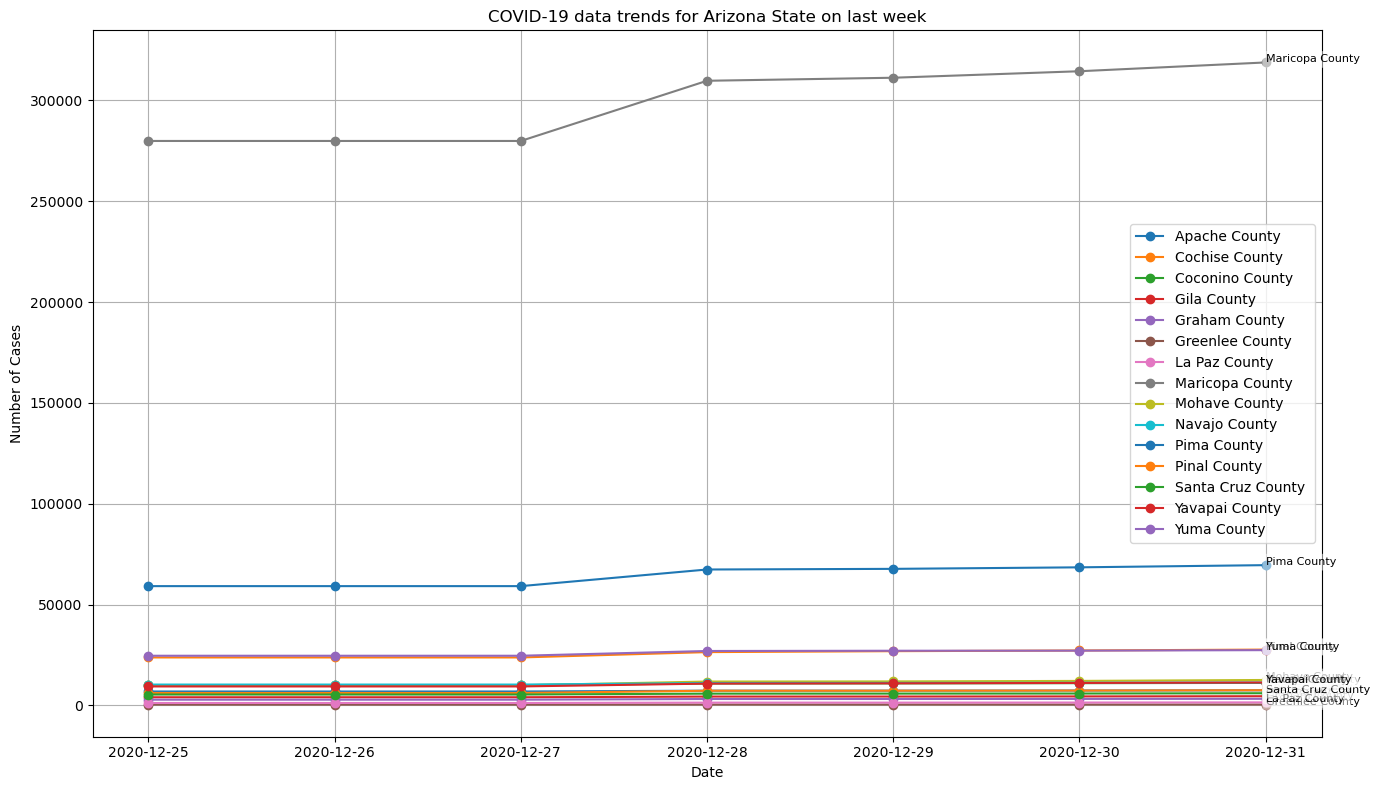

In [114]:
import matplotlib.pyplot as plt

state_data = superdata_2020[superdata_2020['StateFIPS'] == 4] # Filter the data for a state 'Arizona'
#print(state_data.shape)
date_columns = [col for col in state_data.columns if col.endswith('_cases')] # Extract the date columns that end with '_cases'
date_columns.sort()

filter_last_week_dates = date_columns[-7:] # Select columns for the last week

# Extract and convert dates from column names
last_week_dates = [col.split('_')[0] for col in filter_last_week_dates] 
last_week_dates = pd.to_datetime(last_week_dates)

#print("Dates for the last week:", last_week_dates)
plt.figure(figsize=(14, 8)) 
for index, row in state_data.iterrows():
    county_name = row['County Name']
    case_counts = row[filter_last_week_dates].values  # Get case counts for the last week
    plt.plot(last_week_dates, case_counts, marker='o', linestyle='-', label=county_name)
    
    # Annotate the last point of each line with the county name
    plt.text(last_week_dates[-1], case_counts[-1], county_name, fontsize=8, color='black', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.title('COVID-19 data trends for Arizona State on last week')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend() 
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


By analyzing the graph we can see that cases are increasing, decreasing, or stable for each county.
- Apache County: **Stable** 
- Cochise County: **Stable**
- Coconino County: **Stable** 
- Gila County: **Stable** 
- Graham County: **Stable** 
- Greenlee County: **Stable** 
- La Paz County: **Stable** 
- Maricopa County: **Increasing**
- Mohave County: **Stable** 
- Navajo County: **Stable** 
- Pima County: **Increasing**
- Pinal County: **Increasing** 
- Santa Cruz County: **Stable** 
- Yavapai County: **Stable** 
- Yuma County: **Increasing** 

### 7. Enrichment dataset: ACS Demographic and Housing Estimates

To upload dataser file:

1. First download the ACS Demographic and Housing Estimates.csv file from path: Group-4/ACS Demographic and Housing Estimates.csv
2. After downloading, click on the 'Upload' button in the jupyter Notebok interface.
3. Select the dataset file from your local system. 
4. Once uploaded, you can use the file in your notebook by referencing its name.

We can also download it from link: https://data.census.gov/table/ACSDP5Y2020.DP05?q=dp&g=010XX00US$0500000

Below code provides instructions for reading and display a dataset of COVID-19 data using the pandas library.

In [115]:
ACS=pd.read_csv('ACS Demographic and Housing Estimates.csv',skiprows=1)
print("(Rows, Columns)=",ACS.shape)
print(ACS.head())
print(ACS.dtypes) #Data type of all columns

(Rows, Columns)= (3221, 359)
        Geography     Geographic Area Name  \
0  0500000US01001  Autauga County, Alabama   
1  0500000US01003  Baldwin County, Alabama   
2  0500000US01005  Barbour County, Alabama   
3  0500000US01007     Bibb County, Alabama   
4  0500000US01009   Blount County, Alabama   

   Estimate!!SEX AND AGE!!Total population  \
0                                    55639   
1                                   218289   
2                                    25026   
3                                    22374   
4                                    57755   

  Margin of Error!!SEX AND AGE!!Total population  \
0                                          *****   
1                                          *****   
2                                          *****   
3                                          *****   
4                                          *****   

   Estimate!!SEX AND AGE!!Total population!!Male  \
0                                          27052   


### 8. Data Cleaning: ACS Demographic and Housing Estimates

As part of the data cleaning process for the `ACS Demographic and Housing Estimates.csv` dataset, the following steps were implemented:

1. **Exclusion of Puerto Rico Data**:
   - **Action**: Rows where the 'Geography' column values start with '0500000US7' were excluded.
   - **Reason**: The 'Geography' column includes data for all counties within the United States as well as Puerto Rico. Since the `superdata_2020` dataset only contains data for counties within the United States (excluding Puerto Rico), it was necessary to remove Puerto Rican data. Analysis revealed that rows beginning with '0500000US7' correspond to Puerto Rico.
   - **Result**: This step filters the dataset to include only U.S. counties, making the row count approximately match that of the `superdata_2020` dataset.
2. **Remove Prefix from 'Geography' Column**:
    - **Action**: The prefix '0500000US' is removed from the 'Geography' column.
    - **Reason**: For merging with the `superdata_2020` dataset on the `countyFIPS` column, a proper county code is required. The county code is derived from the 'Geography' column after removing the prefix '0500000US'.
    - **Result**: This step produces a unique 5-digit code for each county, which accurately identifies counties within their respective states.
3. **Rename the 'Geography' Column to 'countyFIPS' Column**
    - **Action**: Rename the 'Geography' Column to 'countyFIPS' Column
    - **Reason**: For better understanding and future merging.
    - **Result**: It chage the name of 'Geography' Column to 'countyFIPS' Column in `ACS_filtered` dataset
4. **Change Datatype of 'countyFIPS' column**
    - **Action**: Change the Datatype of 'countyFIPS' column from object to int.
    - **Reason**: For merging with `superdata_2020` dataset column 'countyFIPS' which is an int datatype. Because merging column should contain same datatype 
    - **Result**: It chage the Datatype of 'countyFIPS' column from object to int.
5. **Drop the last column wich contain NaN value**
    - **Action**: Drop the last column
    - **Reason**: Last column is unnamed and it's conatin NaN value for all rows
    - **Result**: Column count can be 358 from 359.

In [116]:
ACS_filtered = ACS[~ACS['Geography'].astype(str).str.startswith('0500000US7')].copy()
#print(ACS_filtered.Geography.nunique())

prefix_to_remove = '0500000US'
# Remove the prefix from the 'Geography' column
ACS_filtered['Geography'] = ACS_filtered['Geography'].astype(str).str.replace(prefix_to_remove, '', regex=False)
ACS_filtered.rename(columns={'Geography': 'countyFIPS'}, inplace=True)
#print(ACS_filtered['countyFIPS'].dtype)
#print(superdata_2020['countyFIPS'].dtype)
ACS_filtered['countyFIPS'] = ACS_filtered['countyFIPS'].astype(int)
ACS_filtered = ACS_filtered.drop(ACS_filtered.columns[-1], axis=1)
print("(Rows, Columns)=",ACS_filtered.shape)
print(ACS_filtered.head())

(Rows, Columns)= (3143, 358)
   countyFIPS     Geographic Area Name  \
0        1001  Autauga County, Alabama   
1        1003  Baldwin County, Alabama   
2        1005  Barbour County, Alabama   
3        1007     Bibb County, Alabama   
4        1009   Blount County, Alabama   

   Estimate!!SEX AND AGE!!Total population  \
0                                    55639   
1                                   218289   
2                                    25026   
3                                    22374   
4                                    57755   

  Margin of Error!!SEX AND AGE!!Total population  \
0                                          *****   
1                                          *****   
2                                          *****   
3                                          *****   
4                                          *****   

   Estimate!!SEX AND AGE!!Total population!!Male  \
0                                          27052   
1                       

### 9. Merging  the COVID-19 data with Enrichment data

- **Covid-19 data name**: `superdata_2020`
- **Enrichment data name**: `ACS_filtered`
- **After merging dataset name**: `merge_Enrichment_data`

After analyzing the two datasets, we perform a merge on the `countyFIPS` column using an `outer` join.

**Reason for Outer Join**: An outer join is used to ensure that all records from both datasets are included in the merged result. This is necessary because there are some `countyFIPS` codes present in the `ACS_filtered` dataset that are not found in the `superdata_2020` dataset. Examples of such `countyFIPS` codes include 2063, 2066, and 2261.

By using an outer join, we can include these records and ensure a comprehensive dataset that captures all relevant information.

In [117]:
merge_Enrichment_data=pd.merge(superdata_2020,ACS_filtered,on=['countyFIPS'],how='outer')
print("(Rows, Columns)= ",merge_Enrichment_data.shape)
print(merge_Enrichment_data.head())
merge_Enrichment_data.to_csv('MergeData.csv', index=False)

(Rows, Columns)=  (3144, 1052)
   countyFIPS      County Name State  StateFIPS  population  2020-01-22_cases  \
0        1001  Autauga County     AL        1.0     55869.0               0.0   
1        1003  Baldwin County     AL        1.0    223234.0               0.0   
2        1005  Barbour County     AL        1.0     24686.0               0.0   
3        1007     Bibb County     AL        1.0     22394.0               0.0   
4        1009   Blount County     AL        1.0     57826.0               0.0   

   2020-01-23_cases  2020-01-24_cases  2020-01-25_cases  2020-01-26_cases  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   ...  \
0  ...   

### 10. Enrichment Data's Role in COVID-19 Spread Analysis with Initial Hypothesis Questions 

Demographic factors like population density, age distribution, and socioeconomic conditions can affect the transmission rate and mortality of COVID-19 in a region. For instance:
- **Population Density and Housing**: The number of housing units, particularly in relation to the population size, can provide insights into population density and crowding, both of which are factors that increase the likelihood of COVID-19 spread.
- **Age Distribution**: Areas with a higher elderly population might experience higher mortality rates since COVID-19 poses a greater risk to older adults.
- **Sex Ratios and COVID-19**: The dataset provides information about the sex ratio, which can be used to analyze if certain trends in the virus's transmission. For example, men were initially found to have a higher risk of severe outcomes from COVID-19.

`Initial Hypothesis Questions:`
The enriched dataset allows us to pose several hypothesis questions for future analysis:
1. Does higher population density correlate with a higher rate of COVID-19 cases?
2. Are counties with a larger elderly population experiencing higher COVID-19 death rates?
3. Does sex ratio influence the COVID-19 death rate?